In [38]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import load_iris
iris = load_iris()

In [39]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [40]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [41]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
df['Flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


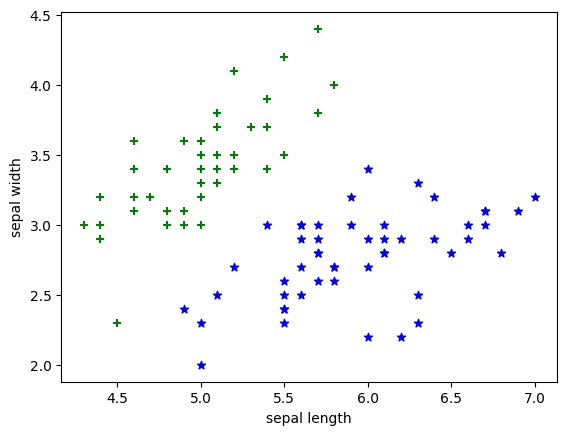

In [47]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'green', marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'blue', marker = '*')


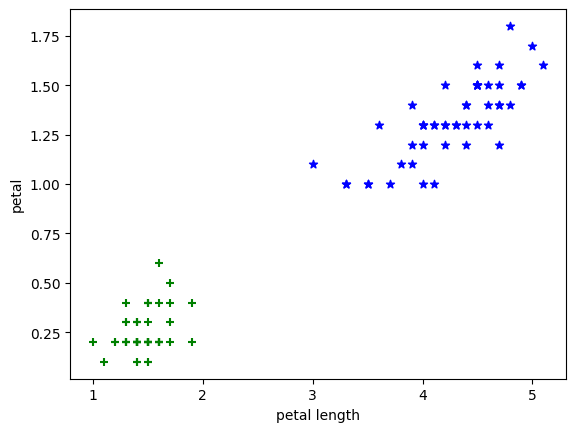

In [48]:
plt.xlabel('petal length')
plt.ylabel('petal')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'green', marker = '+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'blue', marker = '*')


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x = df.drop(['target','Flower_name'],axis='columns')
y=df.target
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [52]:
model = SVC()

In [53]:
model.fit(x_train,y_train)

SVC()

In [55]:
model.predict(x_test)

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0,
       0, 1, 1, 2, 1, 1, 2, 0])

In [56]:
model.score(x_test,y_test)

0.9666666666666667

In [57]:
y_predict = model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
cm

array([[15,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  5]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

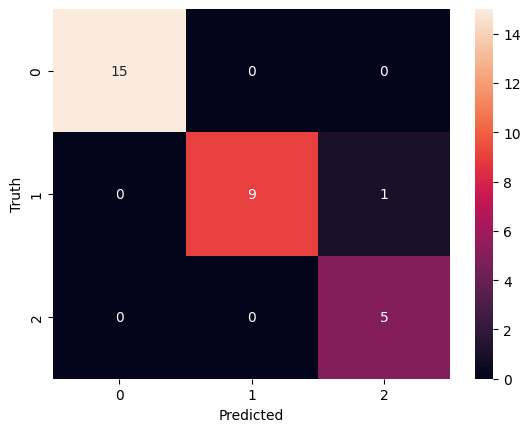

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure()
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')